<a href="https://colab.research.google.com/github/PedroEsch/Rede_MLP_Correcao_trajetoria_Hbot_or_CoreXY/blob/main/Integral_da_equa%C3%A7%C3%A3o_de_lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

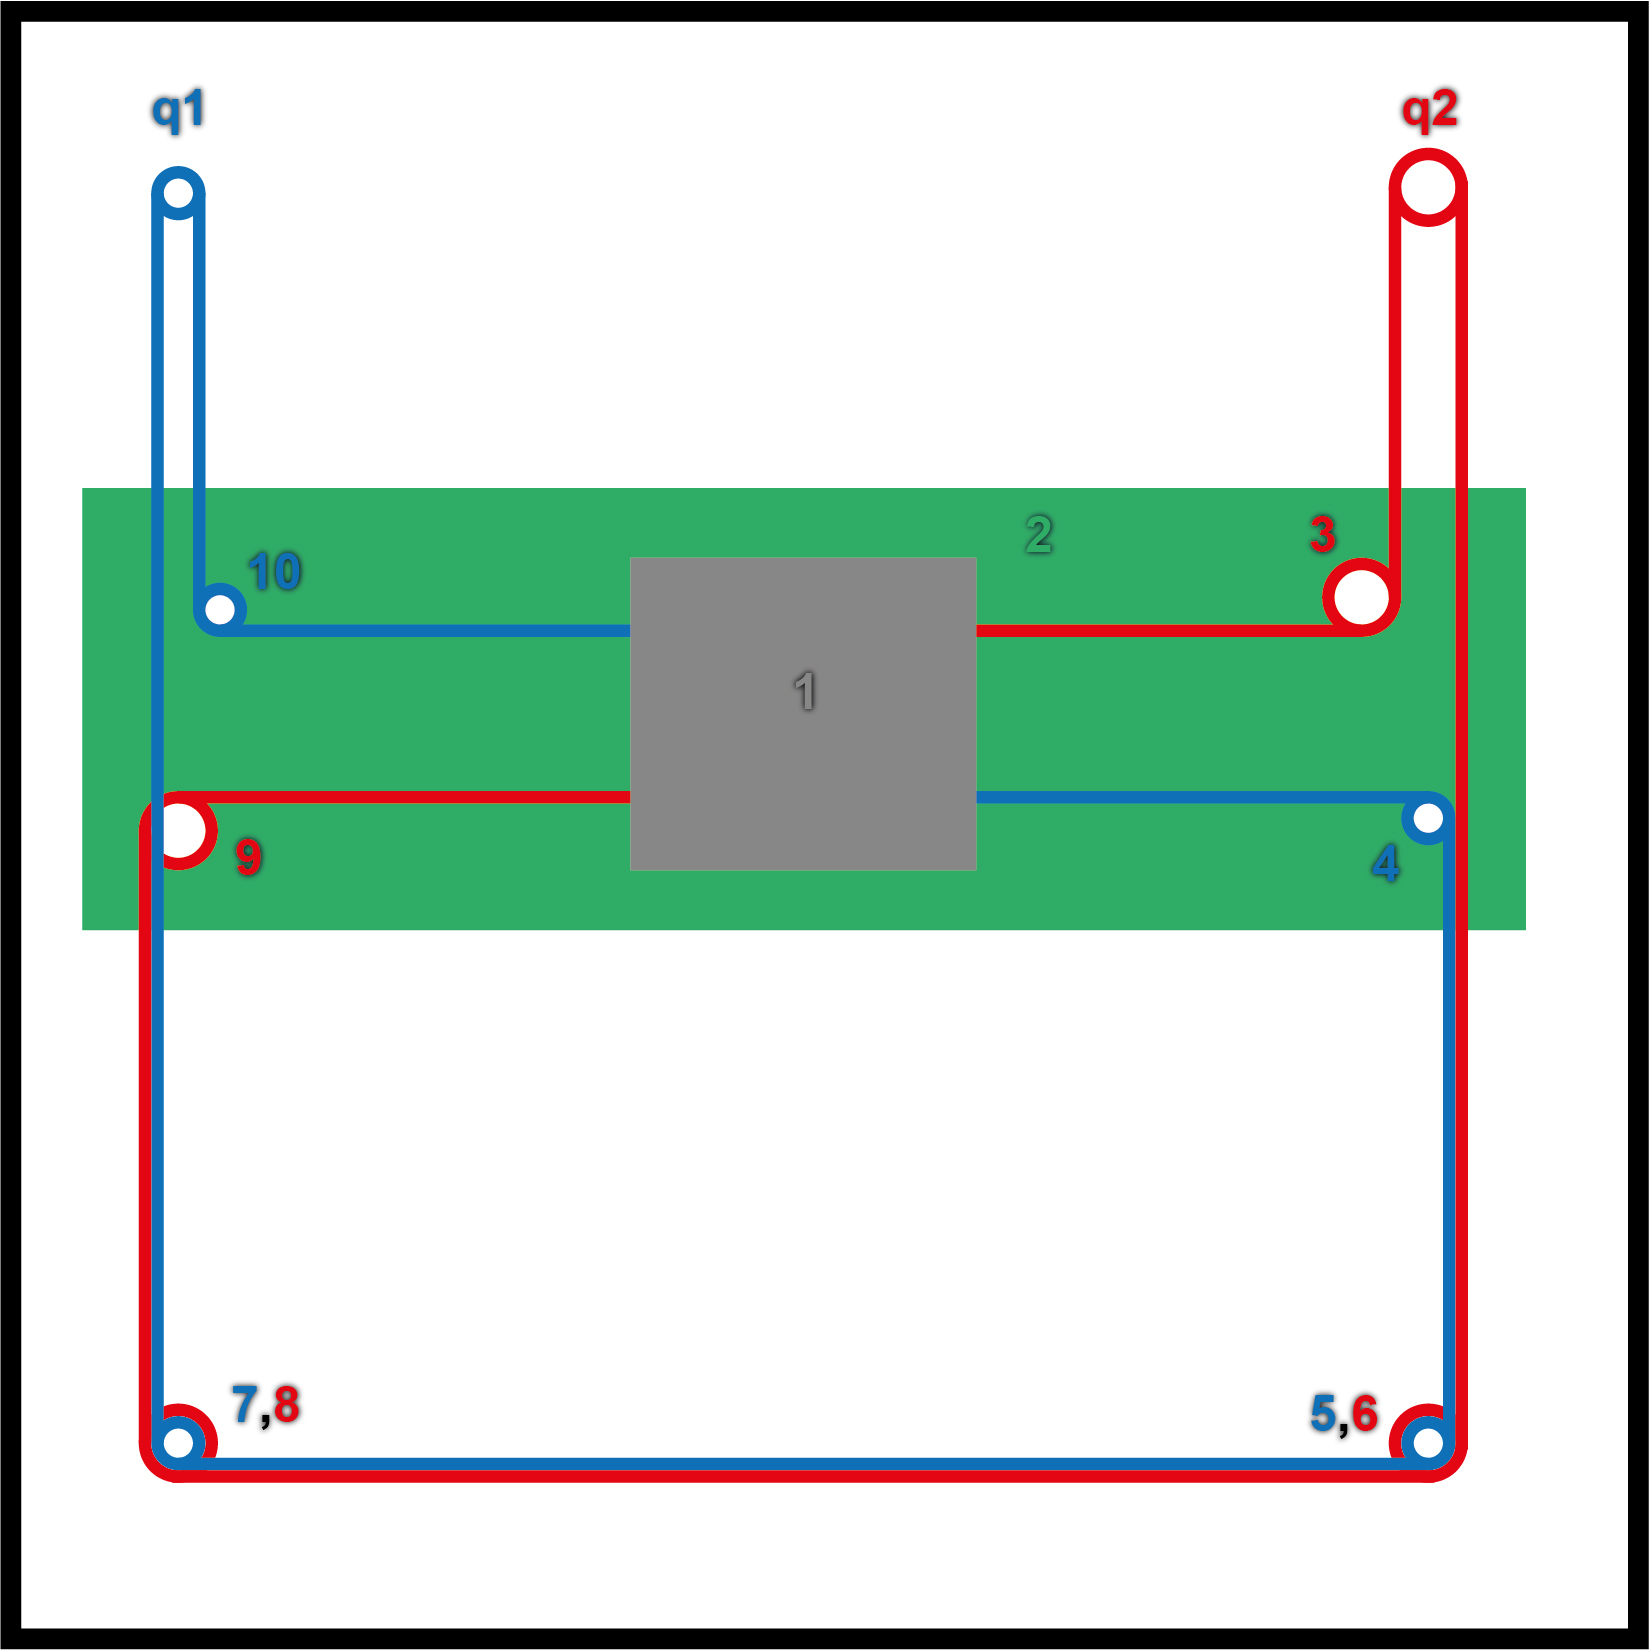

In [ ]:
#@title Biblioteca e constantes
import numpy as np
from random import uniform
from scipy.integrate import odeint
from numpy import pi
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import time

# Constantes

# M
M = 0.004
M1 = 0.4
M2 = 0.18
M3 = M
M4 = M
M5 = M
M6 = M
M7 = M
M8 = M
M9 = M
M10 = M

# r
R1 = 0.005
R2 = 0.005
r = 0.012
r3 = r
r4 = r
r5 = r
r6 = r
r7 = r
r8 = r
r9 = r
r10 = r

# I
I = (1/2)*M*(r**2)
I3 = I
I4 = I
I5 = I
I6 = I
I7 = I
I8 = I
I9 = I
I10 = I

# K
k = 1e4
Kq110 = k
K7q1 = k
K3q2 = k
Kq26 = k
K13 = k
K14 = k
K45 = k
K57 = k
K68 = k
K89 = k
K91 = k
K101 = k

# C
c = 5e-2
C3 = c
C4 = c
C5 = c
C6 = c
C7 = c
C8 = c
C9 = c
C10 = c

# Medidas padrão
X = 0.42
C = 0.02
Y = 0.46

In [ ]:
#@title Função

# função que retorna dy/dt
def eq_lagrange(var,t):
  xint, yint, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10 = var[0], var[1], var[2], var[3], var[4], var[5], var[6], var[7], var[8], var[9]
  xintp, yintp, theta3p, theta4p, theta5p, theta6p, theta7p, theta8p, theta9p, theta10p = var[10], var[11], var[12], var[13], var[14], var[15], var[16], var[17], var[18], var[19]

  if (t<=tr):
    xd = xp_d*t + xd0
    yd = yp_d*t + yd0
  else:
    xd = xf
    yd = yf

  q1 = ((yd+X-(C/2)-xd)/R1 -q10)
  q2 = ((-yd-xd+(C/2))/R2 -q20)

  #0
  xintpp = -(
            - K14*(L14-xint-r4*theta4)
            + K101*(L101+xint-r10*theta10)
            - K13*(L13-xint+r3*theta3)
            + K91*(L91+xint+r9*theta9)
            )/M1
  #1
  yintpp =  -(
            + K45*(L45+yint+r4*theta4-r5*theta5)
            - Kq110*(Lq110-yint+r10*theta10+R1*q1)
            - K3q2*(L3q2-yint-r3*theta3-R2*q2)
            + K89*(L89+yint+r8*theta8-r9*theta9)
            )/(M1+M2+M3+M4+M9+M10)
  #2
  theta3pp = (-C3*theta3p
              - (
                  + K13*r3*(L13-xint+r3*theta3)
                  - K3q2*r3*(L3q2-yint-r3*theta3-R2*q2)
                )
              )/I3
  #3
  theta4pp = (-C4*theta4p
              - (
                  - K14*r4*(L14-xint-r4*theta4)
                  + K45*r4*(L45+yint+r4*theta4-r5*theta5)
                )
              )/I4
  #4
  theta5pp = (-C5*theta5p
              - (
                  - K45*r5*(L45+yint+r4*theta4-r5*theta5)
                  + K57*r5*(L+r5*theta5-r7*theta7)
                )
              )/I5
  #5
  theta6pp = (-C6*theta6p
              - (
                  - Kq26*r6*(L+R2*q2-r6*theta6)
                  + K68*r6*(L+r6*theta6-r8*theta8)
                )
              )/I6
  #6
  theta7pp = (-C7*theta7p
              - (
                  - K57*r7*(L+r5*theta5-r7*theta7)
                  + K7q1*r7*(L+r7*theta7-R1*q1)
                )
              )/I7
  #7
  theta8pp = (-C8*theta8p
              - (
                  - K68*r8*(L+r6*theta6-r8*theta8)
                  + K89*r8*(L89+yint+r8*theta8-r9*theta9)
                )
              )/I8
  #8
  theta9pp = (-C9*theta9p
              - (
                  - K89*r9*(L89+yint+r8*theta8-r9*theta9)
                  + K91*r9*(L91+xint+r9*theta9)
                )
              )/I9
  #9
  theta10pp = (-C10*theta10p
               - (
                  + Kq110*r10*(Lq110-yint+r10*theta10+R1*q1)
                  - K101*r10*(L101+xint-r10*theta10)
                  )
               )/I10

  varp = np.empty(20)
  varp[:10] = [xintp, yintp, theta3p, theta4p, theta5p, theta6p, theta7p, theta8p, theta9p, theta10p]
  varp[10:] = [xintpp, yintpp, theta3pp, theta4pp, theta5pp, theta6pp, theta7pp, theta8pp, theta9pp, theta10pp]
  return varp

In [ ]:
tempo = time.time()
xf = uniform(C/2, X-C/2)
yf = uniform(0, Y)

npontos = 10000

matriz = np.zeros((npontos,8))

for i in range(npontos):

  # Condições iniciais
  xi = xf
  yi = yf
  var0 = np.zeros(20)
  var0[0] = xi
  var0[1] = yi

  # L
  L = 0
  Lq110 = yi
  L3q2 = yi
  L13 = xi
  L14 = xi
  L45 = -yi
  L89 = -yi
  L91 = -xi
  L101 = -xi

  # Condições finais
  xf = uniform(C/2, X-C/2)
  yf = uniform(0, Y)

  # Tempo requerido, velocidade limite = 0.3 m/s
  xd0 = xi
  yd0 = yi
  d = ((xf-xi)**2+(yf-yi)**2)**(1/2)
  tr = d/0.3
  xp_d = (xf-xi)/tr
  yp_d = (yf-yi)/tr

  q10 = (yd0+X-(C/2)-xd0)/R1
  q20 = (-yd0-xd0+(C/2))/R2

  tf = tr#+0.2

  # Pontos temporais
  t = np.linspace(0,tf,1000)

  # Solução da ODE
  vart = odeint(eq_lagrange,var0,t)

  q1f = (yf+X-(C/2)-xf)/R1
  q2f = (-yf-xf+(C/2))/R2
  matriz[i,:] = np.array([xi, yi, vart[len(t)-1,0], vart[len(t)-1,1], q1f, q2f, xf, yf])
  #print(matriz[i])
print(time.time()-tempo)

795.1231563091278


In [ ]:
np.savez_compressed('/content/drive/My Drive/nuvem_de_pontos-k1e4-C5e-2-np10000.npz', matriz=matriz)

#from google.colab import files
#files.download('/content/drive/My Drive/nuvem_de_pontosC5e-3.npz')

In [ ]:
print('xf:', vart[len(t)-1,0])
print('yf:', vart[len(t)-1,1])

xf: 0.26237166167076814
yf: 0.30443972770750255


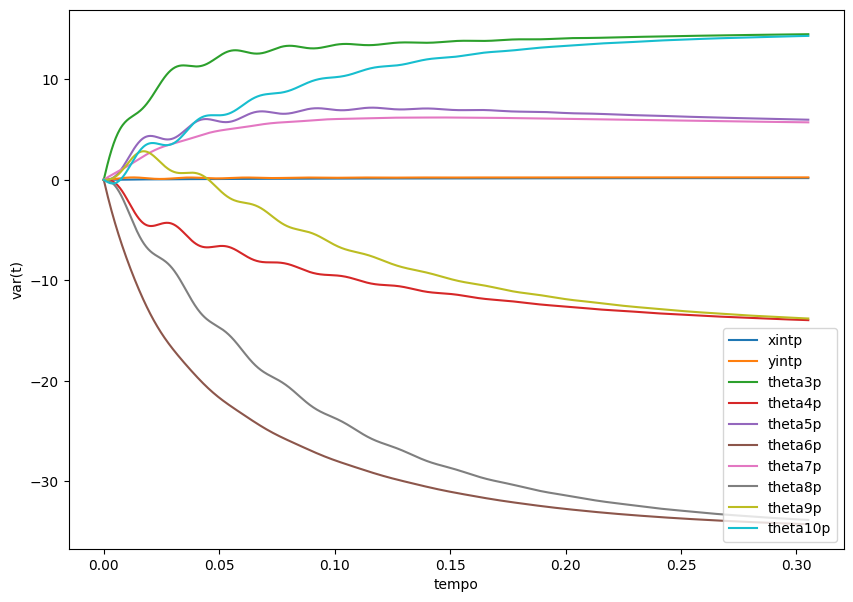

In [ ]:
# plotagem dos resultados
plt.figure(figsize = (10,7))
plt.plot(t,vart[:,10],t,vart[:,11],t,vart[:,12],t,vart[:,13],t,vart[:,14],t,vart[:,15],t,vart[:,16],t,vart[:,17],t,vart[:,18],t,vart[:,19])
plt.xlabel('tempo')
plt.ylabel('var(t)')
plt.legend(['xintp', 'yintp', 'theta3p', 'theta4p', 'theta5p', 'theta6p', 'theta7p', 'theta8p', 'theta9p', 'theta10p'], loc=4)
plt.show()

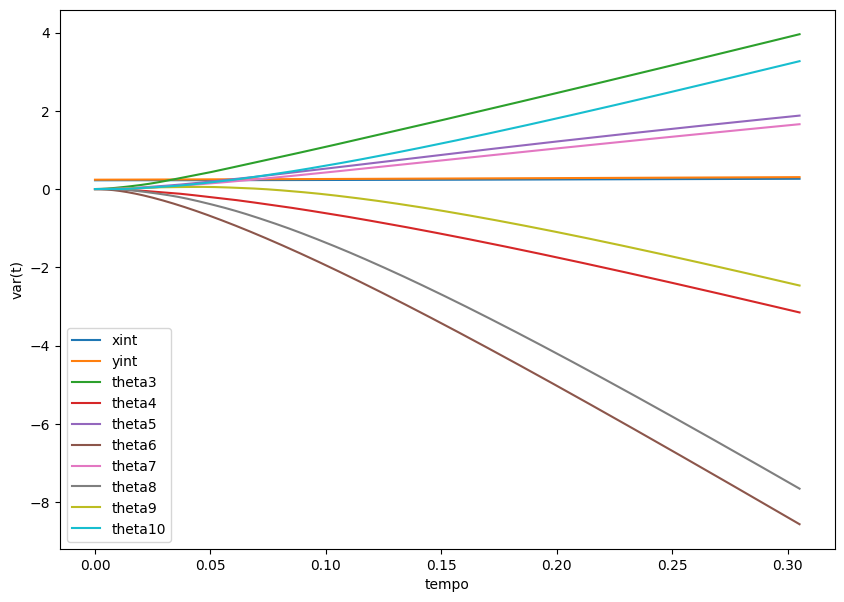

In [ ]:
# plotagem dos resultados
plt.figure(figsize = (10,7))
plt.plot(t,vart[:,0],t,vart[:,1],t,vart[:,2],t,vart[:,3],t,vart[:,4],t,vart[:,5],t,vart[:,6],t,vart[:,7],t,vart[:,8],t,vart[:,9])
plt.xlabel('tempo')
plt.ylabel('var(t)')
plt.legend(['xint', 'yint', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8', 'theta9', 'theta10'])
plt.show()

In [ ]:
print(matriz[9999])

[   0.2238441     0.23894585    0.26237166    0.30443973   88.94570706
 -116.1486476     0.27800735    0.31273589]


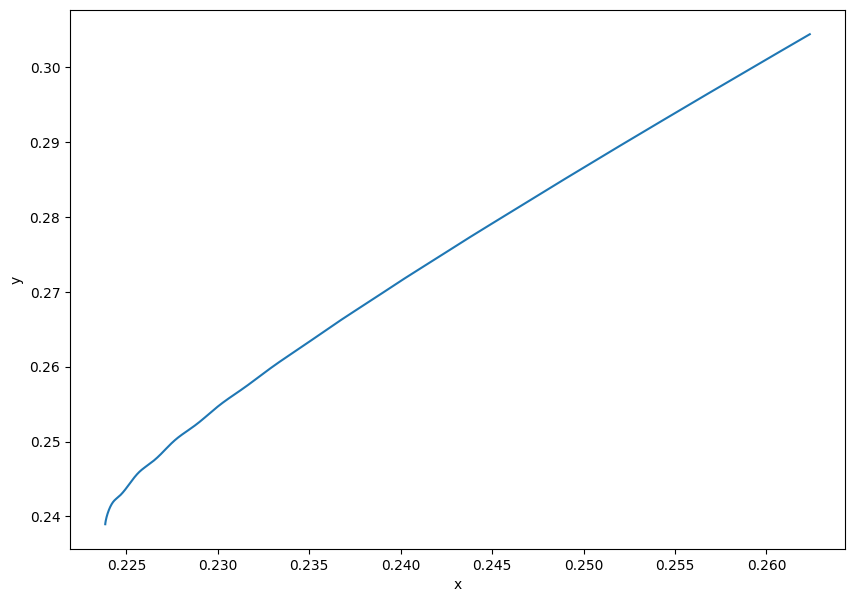

In [ ]:
# plotagem dos resultados
plt.figure(figsize = (10,7))
plt.plot(vart[:,0],vart[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#@title Erro
def mse(real, previsto):
  real = np.array(real)
  previsto = np.array(previsto)
  media = np.zeros(len(previsto))
  for i in range(len(previsto)):
    media[i] = real[i]-previsto[i]
  return np.mean(abs(media))

print("erro x: ",mse(matriz[:,2],matriz[:,6]))
print("erro y: ",mse(matriz[:,3],matriz[:,7]))

erro x:  0.016325584495002137
erro y:  0.006883344564998147


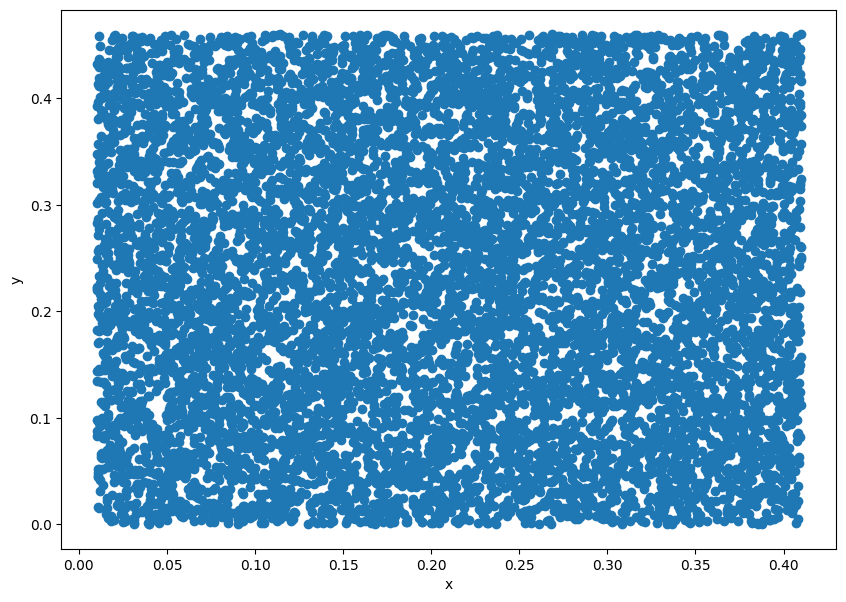

In [ ]:
# plotagem dos resultados
plt.figure(figsize = (10,7))
plt.scatter(matriz[:,0],matriz[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()